In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [44]:
def geometric_mean(data:pd.DataFrame) -> pd.DataFrame:
#     data["geometric_mean"] = (data["1_precision"] + data["2_recall"] + data["2_precision"] + data["3_recall"] 
#                            + data["4_recall"] + data["5_precision"]) ** 1/6. 
    data["geometric_mean"] = (data["1_precision"] + 
                              data["2_recall"] + data["2_precision"] + 
                              data["3_recall"] + data["3_precision"] + 
                              data["4_recall"] + data["4_precision"] + 
                              data["5_precision"]) ** 1/8. 
    return data


def harmonic_mean(data:pd.DataFrame) -> pd.DataFrame:
#     data["harmonic_mean"] = 6 / (1/data["1_precision"] + 1/data["2_recall"] + 1/data["2_precision"] + 
#                                  1/data["2_recall"] + 
#                                  1/data["3_recall"] + 
#                                  1/data["4_recall"] + 
#                                  1/data["5_precision"])
    data["harmonic_mean"] = 8 / (1/data["1_precision"] + 
                                 1/data["2_recall"] + 1/data["2_precision"] + 
                                 1/data["3_recall"] + 1/data["3_precision"] + 
                                 1/data["4_recall"] + 1/data["4_precision"] + 
                                 1/data["5_precision"])
#     data["harmonic_mean"] = 3 / (1/data["1_precision"] + 1/data["2_recall"] + 1/data["2_precision"])
    return data

In [26]:
REPORT_DIR='../../reports'
REPORTS = [
    "2019-05-23-run_classifiers-999-report.csv", 
    "2019-05-24-run_classifiers-report.csv",
    "2019-05-29-run_classifiers-report.csv",
    "2019-05-31-run_classifiers-report.csv",
    "2019-05-31-run_classifiers-report-smotevsnosmote.csv",
    "2019-06-11-run_classifiers-report-encodings.csv"
]

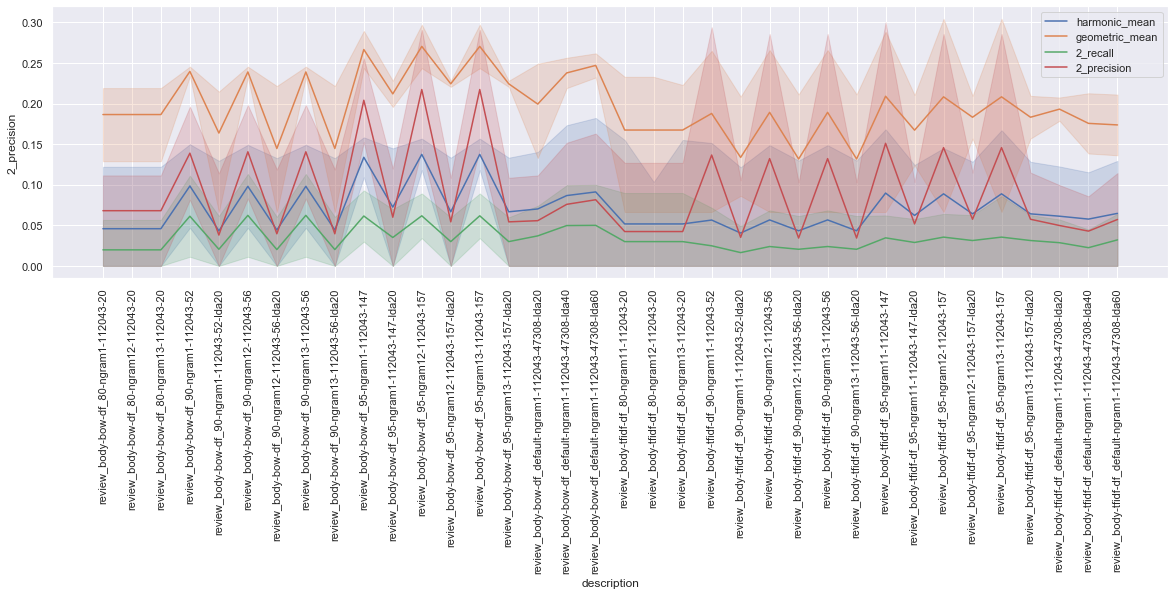

In [45]:
report = pd.read_csv(f"{REPORT_DIR}/2019-05-24-run_classifiers-report.csv")
report = geometric_mean(report)
report = harmonic_mean(report)

f, a = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(data=report, x="description", y="harmonic_mean", label="harmonic_mean")
sns.lineplot(data=report, x="description", y="geometric_mean", label="geometric_mean")
sns.lineplot(data=report, x="description", y="2_recall", label="2_recall")
sns.lineplot(data=report, x="description", y="2_precision", label="2_precision")
_ = plt.xticks(rotation=90)




Looking at report: 2019-05-23-run_classifiers-999-report.csv


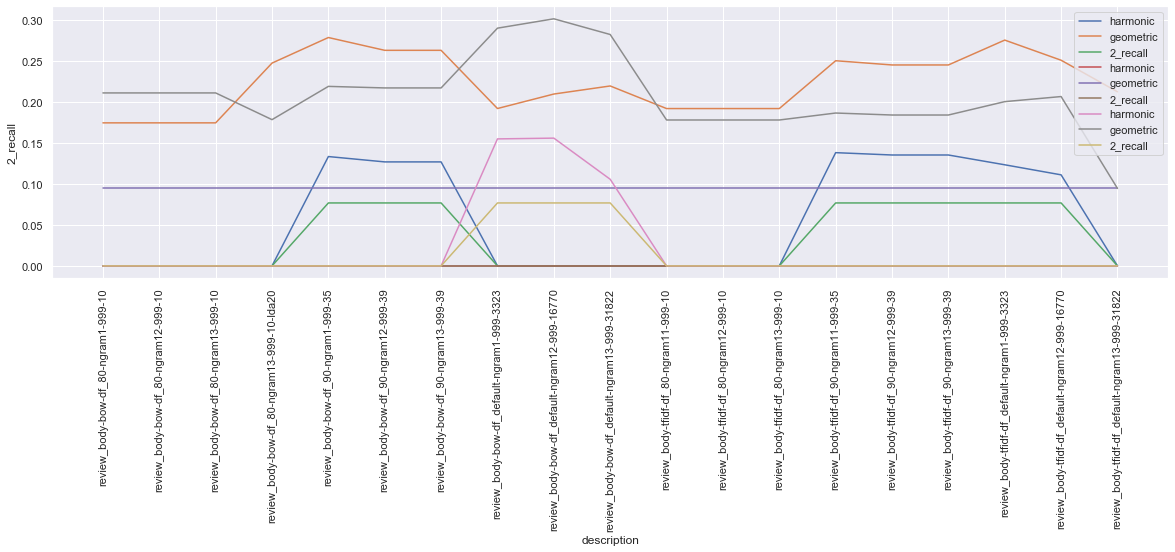



Looking at report: 2019-05-24-run_classifiers-report.csv


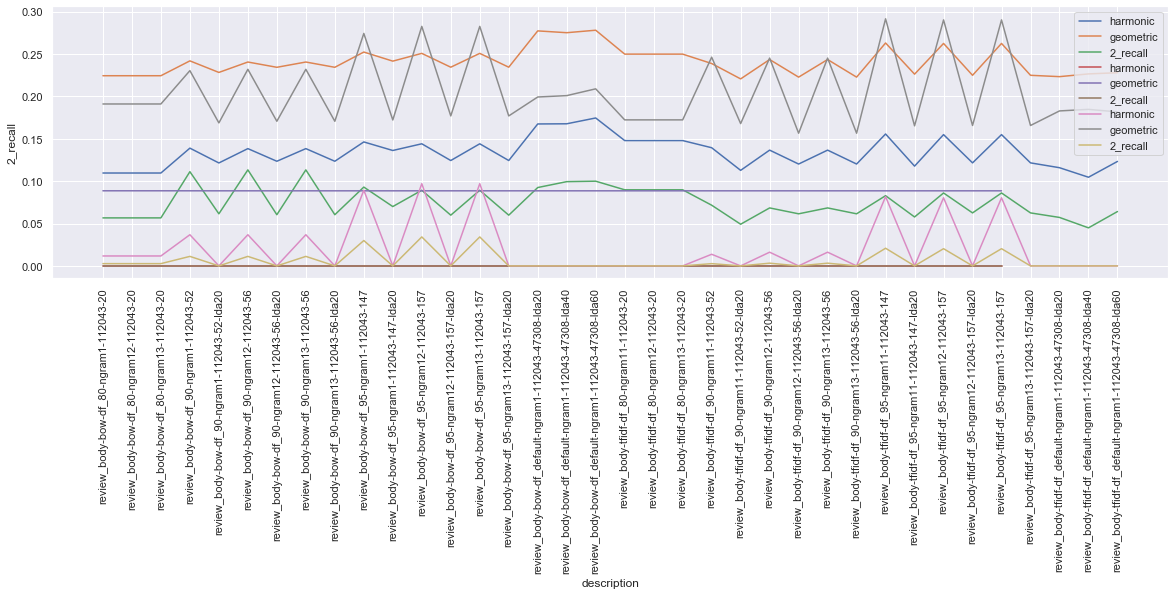



Looking at report: 2019-05-29-run_classifiers-report.csv


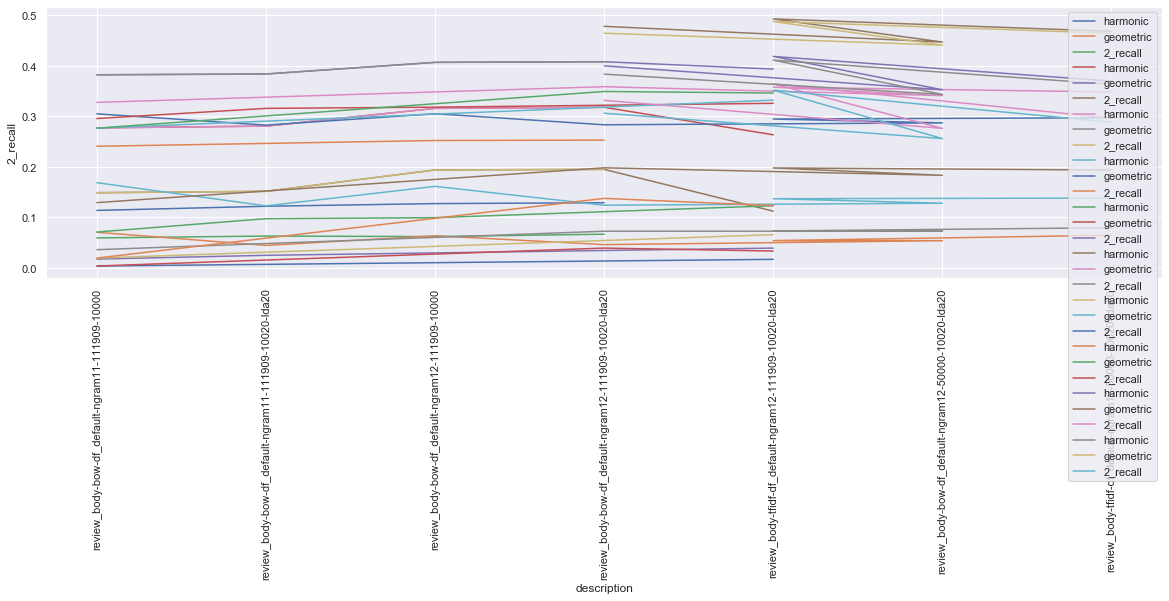



Looking at report: 2019-05-31-run_classifiers-report.csv


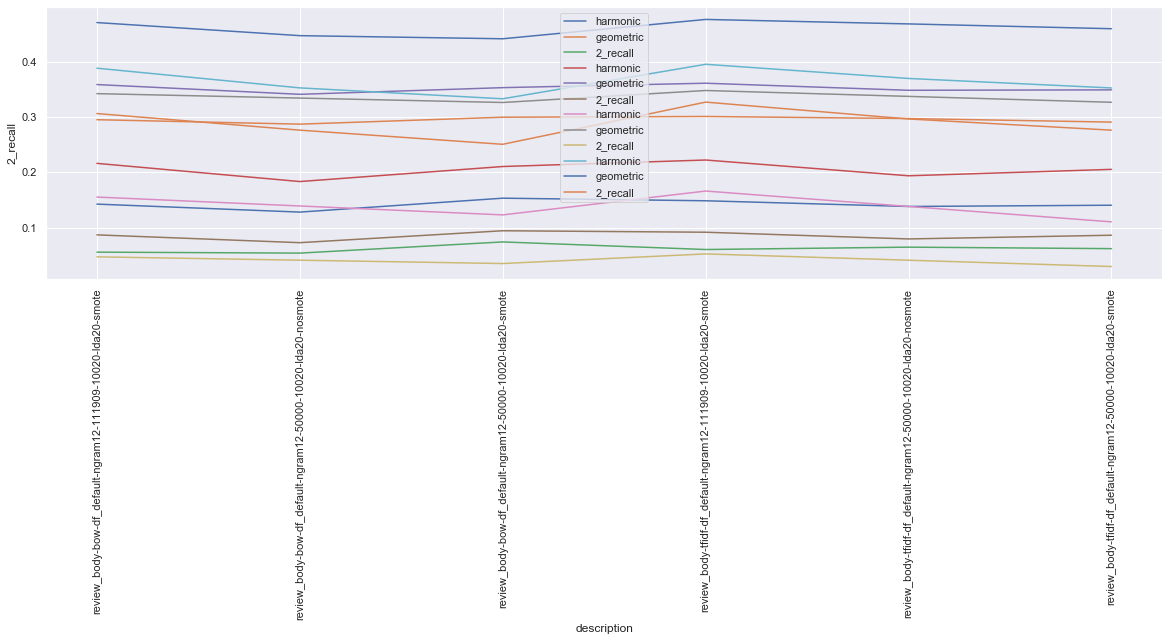



Looking at report: 2019-05-31-run_classifiers-report-smotevsnosmote.csv


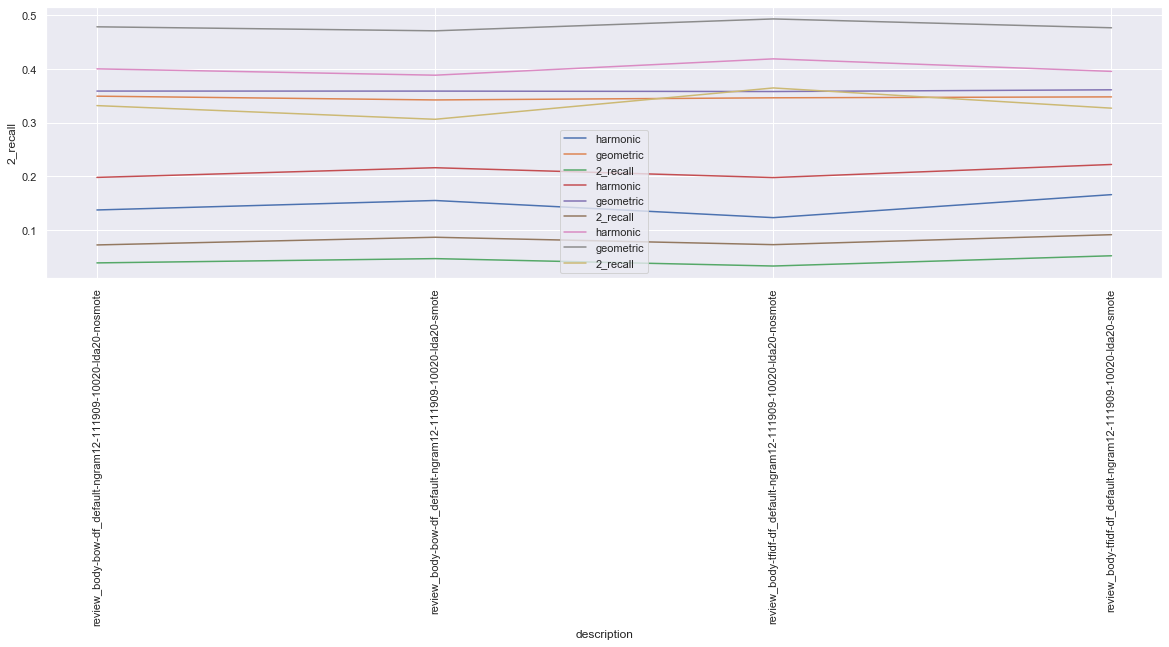



Looking at report: 2019-06-11-run_classifiers-report-encodings.csv


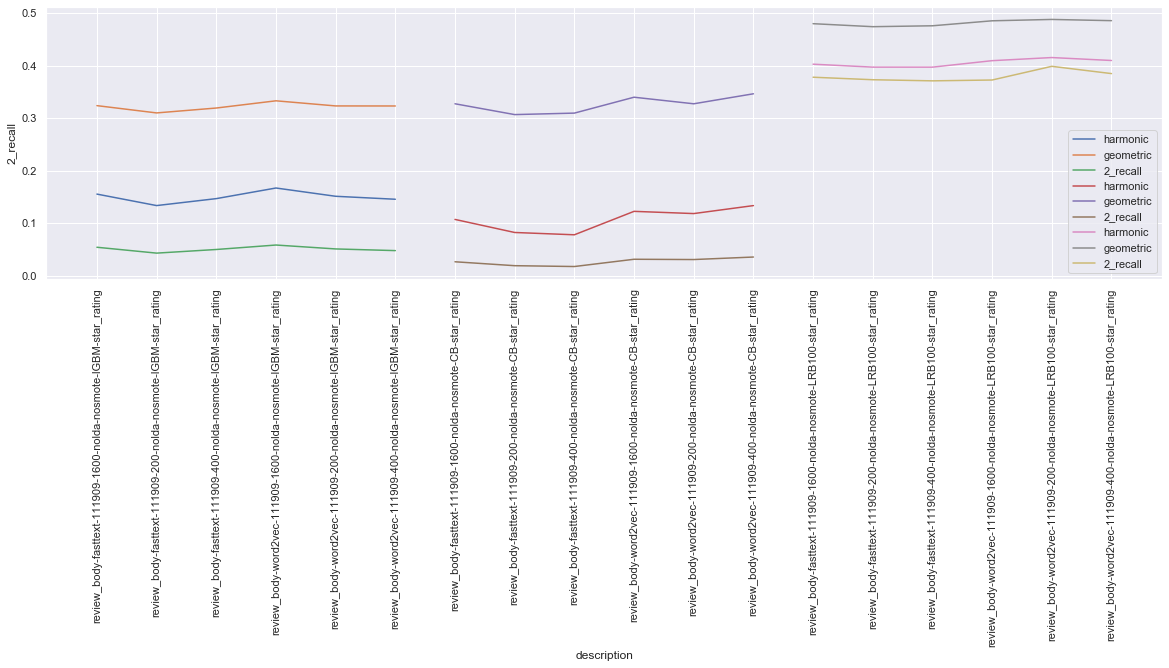

In [16]:

for report in REPORTS:
    print(f'\n\nLooking at report: {report}')
    report = pd.read_csv(f'{REPORT_DIR}/{report}')
    report = geometric_mean(report)
    report = harmonic_mean(report)
    columns = ["1_recall", "2_recall", "3_recall", "4_recall", "5_precision", "geometric_mean", "harmonic_mean"]
    
    

    f, a = plt.subplots(1, 1, figsize=(20, 5))
    for model in report.model_name.unique():
        lr = report[report.model_name == model]
        sns.lineplot(data=lr, x="description", y="harmonic_mean", label="harmonic")
        sns.lineplot(data=lr, x="description", y="geometric_mean", label="geometric")
        sns.lineplot(data=lr, x="description", y="2_recall", label="2_recall")
    _ = plt.xticks(rotation=90)
    plt.show()



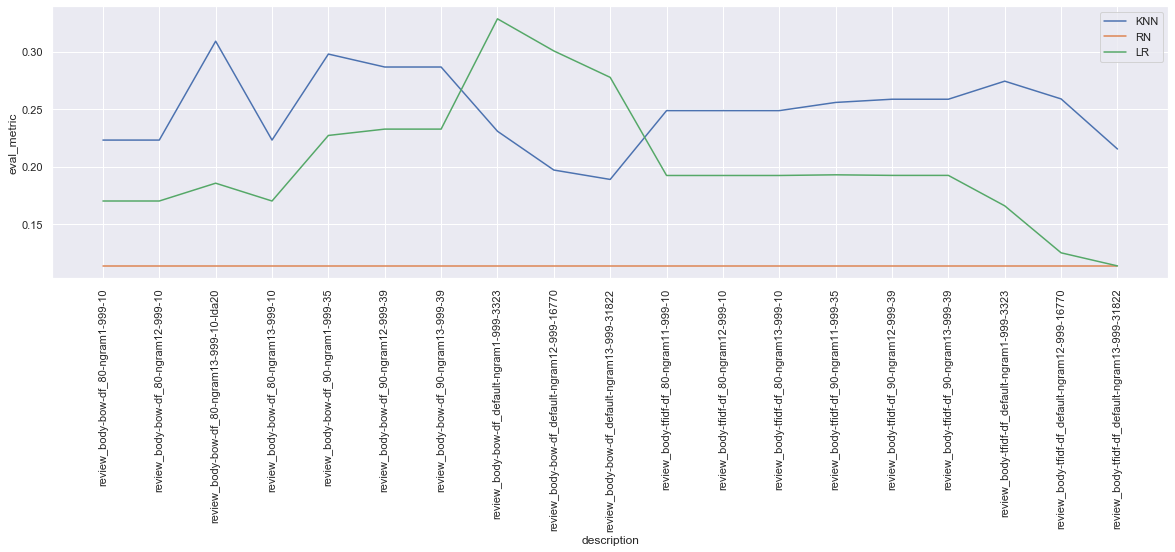